In [1]:
import quantumpropagator as qp
from ipywidgets import interactive, interact, HBox, Layout, VBox
import pandas as pd
import os
from tqdm import tqdm_notebook as tqdm
import ipywidgets as widgets
from ipywidgets import interact, fixed
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
import numpy as np
display(HTML("<style>.container { width:100% !important; }</style>"))
#%matplotlib inline
%matplotlib notebook
# import seaborn
# from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_rows = 5
pd.options.display.max_columns = 90

print ('everything loaded')

no display found. Using non-interactive Agg backend


everything loaded


In [34]:
fol = 'C:\\Users\\utente\\Desktop\\DATA\\USA'
subfolders = sorted([dir for dir in os.listdir(
    fol) if os.path.isdir(os.path.join(fol, dir))])
print(''.join(['{:2} -> {}\n'.format(a, b) for a, b in enumerate(subfolders)]))

 0 -> Old-m-only-IR-middle140
 1 -> b-UV-0.22_0000
 2 -> d-experiments_smooth01_0000
 3 -> d-experiments_smooth10_0000
 4 -> experiment_alessio_0000
 5 -> m-IR-Polarized-NOR_0000
 6 -> m-only_IR_middle140-9331_0000
 7 -> m-only_IR_middle140_0000
 8 -> m-only_IR_middle140_div10_0000
 9 -> position-from1_0000
10 -> position-from1_mult_0000
11 -> position-from2_0000
12 -> position-from2_mult_0000
13 -> position-from3_0000
14 -> position-from3_mult_0000
15 -> position-from4_0000
16 -> position-from4_mult_0000
17 -> position-from5_0000
18 -> position-from6_0000
19 -> position-from7_0000
20 -> smoothing_only_17_0000
21 -> smoothing_only_9_0000
22 -> smoothing_only_NOT_smoothed_0000
23 -> y-IR140-S0notdivided_0000
24 -> y-IR_140_nac0_0000
25 -> y-UV-S0notdivided_0000
26 -> z-from1_0000



In [35]:
def from_folder_to_dataframe(folder):
    '''
    this function returns the dataframe given a folder
    '''
    project_folder = os.path.abspath(folder)
    output_norm = os.path.join(project_folder, 'output')
    output_popu = os.path.join(project_folder, 'outputPopul')
    output_csv = os.path.join(project_folder,os.path.basename(folder) + '.csv')

    df_norm = pd.read_csv(output_norm, delim_whitespace=True, index_col=0, names=[
                          'counter', 'steps', 'fs', 'Norm deviation', 'Kinetic', 'Potential', 'Total', 'Total Deviation', 'Xpulse', 'Ypulse', 'Zpulse', 'AbZino'])
    df_popu = pd.read_csv(output_popu, delim_whitespace=True, names=[
                          'fs', 'S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
    df_all = pd.concat([df_norm, df_popu], axis=1)

    output_abso = os.path.join(project_folder, 'Output_Abs')
    if os.path.isfile(output_abso):
        df_abso = pd.read_csv(output_abso, delim_whitespace=True, names=[
                              'Time AU', 'Abs Tot', 'Abs S0', 'Abs S1', 'Abs S2', 'Abs S3', 'Abs S4', 'Abs S5', 'Abs S6', 'Abs S7'])
        df_all = pd.concat([df_all, df_abso], axis=1)
    

        AU_dt = qp.fromFsToAu(df_popu['fs'].iloc[1])
        for electronic_state in ['Tot','S0','S1','S2','S3','S4','S5','S6','S7']:
            df_all['P(t) {}'.format(electronic_state)] = -(np.cumsum(df_all['Abs {}'.format(electronic_state)])*AU_dt)

    df_all.to_csv(output_csv)

    return(df_all)

# Smoothing effects

<IPython.core.display.Javascript object>


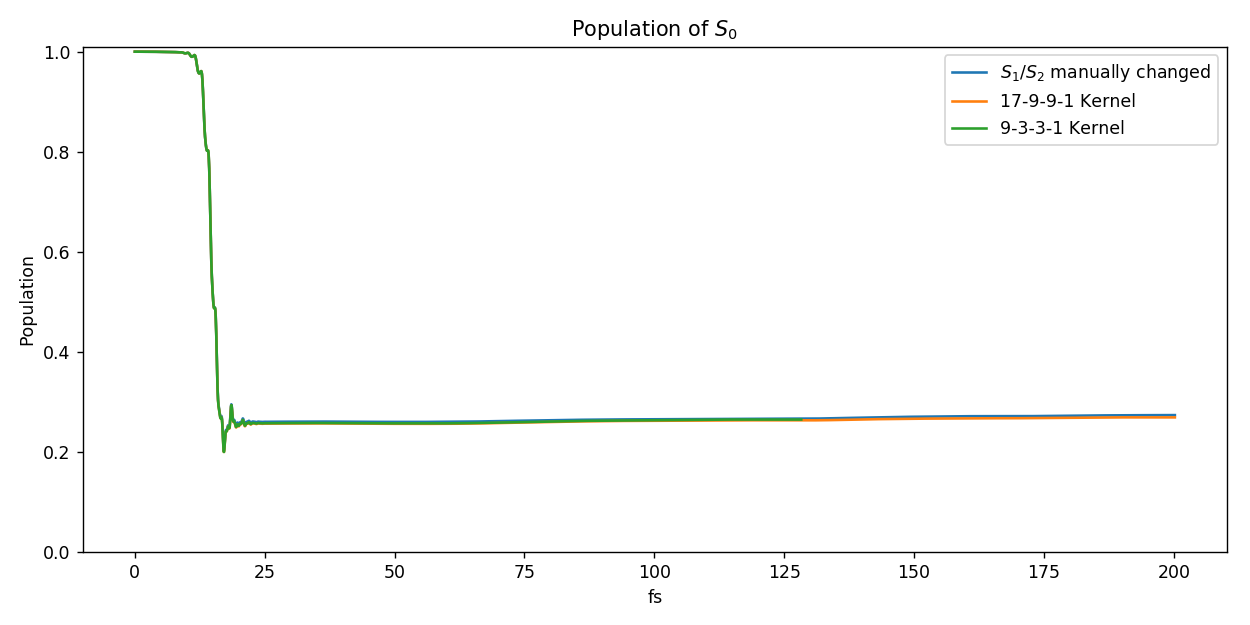

In [36]:
def make_population_graphs(multiple_dataframes, names, rangeS):
    for state in rangeS:
        fig, ax0 = plt.subplots(1, 1, figsize=(10, 5))
        ax0.set_xlabel('fs')
        ax0.set_ylabel('Population')
        ax0.set_ylim(0, 1.01)
        #ax0.set_ylim(0, 0.3)
        ax0.set_title(r'Population of $S_{}$'.format(state))
        for i, df in enumerate(multiple_dataframes):
            ax0.plot(df['fs'].iloc[:, 1],
                     df['S{}'.format(state)], label=names[i])
        ax0.legend()
        fig.tight_layout()

        
numbers = [0, 2, 21]
names = [subfolders[x] for x in numbers]
names = ['$S_1/S_2$ manually changed', '17-9-9-1 Kernel', '9-3-3-1 Kernel']
dfs = [from_folder_to_dataframe(
    os.path.join(fol, subfolders[x])) for x in numbers]

how_many_states = 1
make_population_graphs(dfs, names, range(how_many_states))

# position runs

## not multiplied

<IPython.core.display.Javascript object>


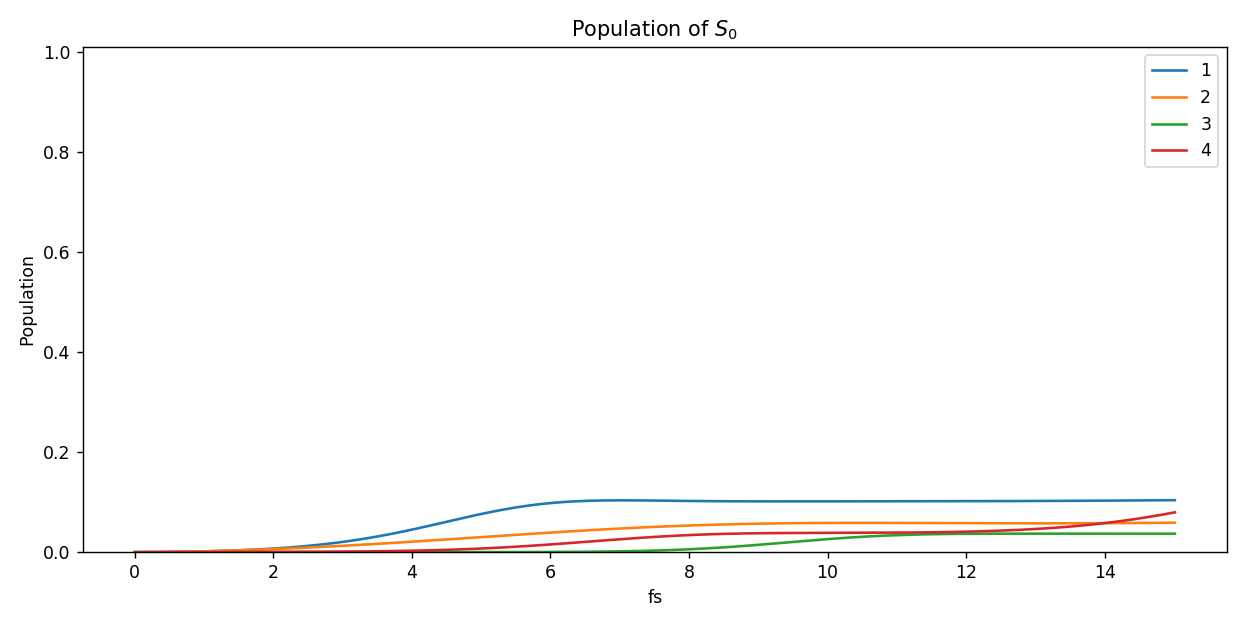

<IPython.core.display.Javascript object>


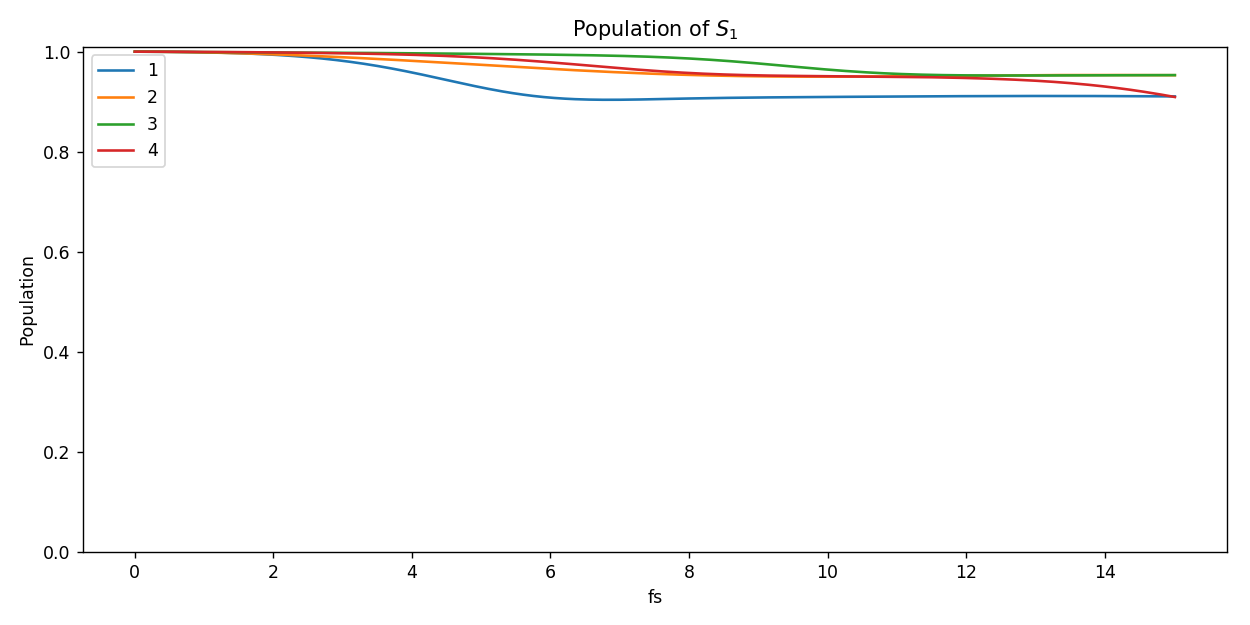

In [37]:
numbers = [9,11,13,15]

names = ['1', '2', '3', '4']
dfs = [from_folder_to_dataframe(
    os.path.join(fol, subfolders[x])) for x in numbers]
how_many_states = 2
make_population_graphs(dfs, names, range(how_many_states))

## multiplied

<IPython.core.display.Javascript object>


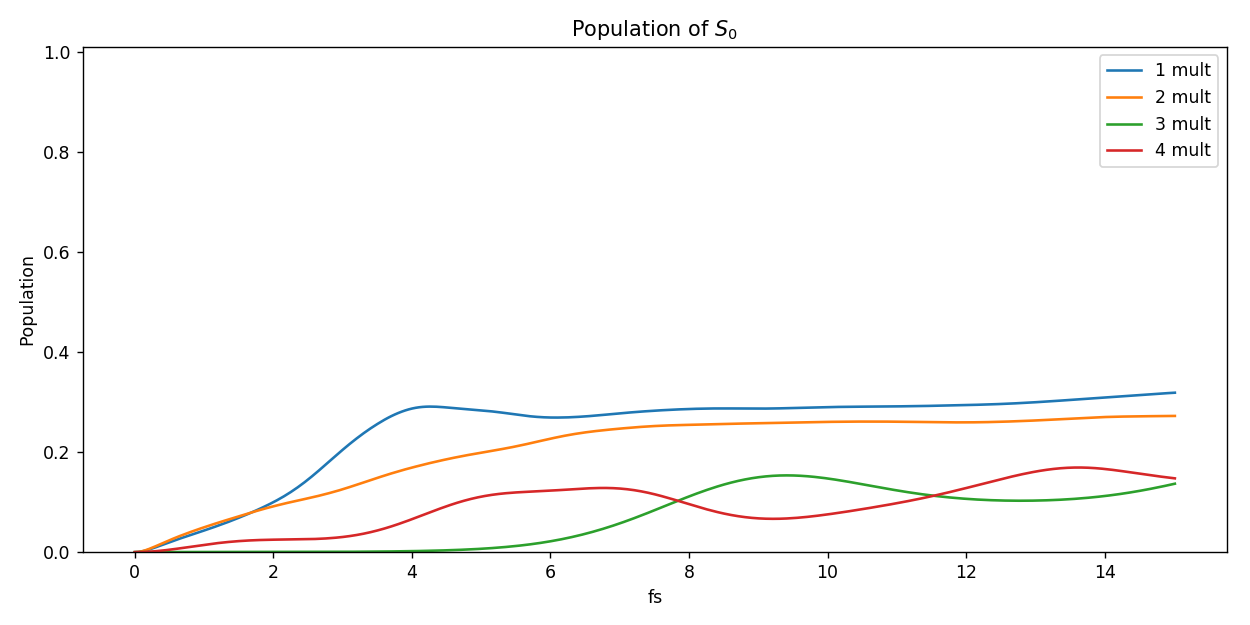

<IPython.core.display.Javascript object>


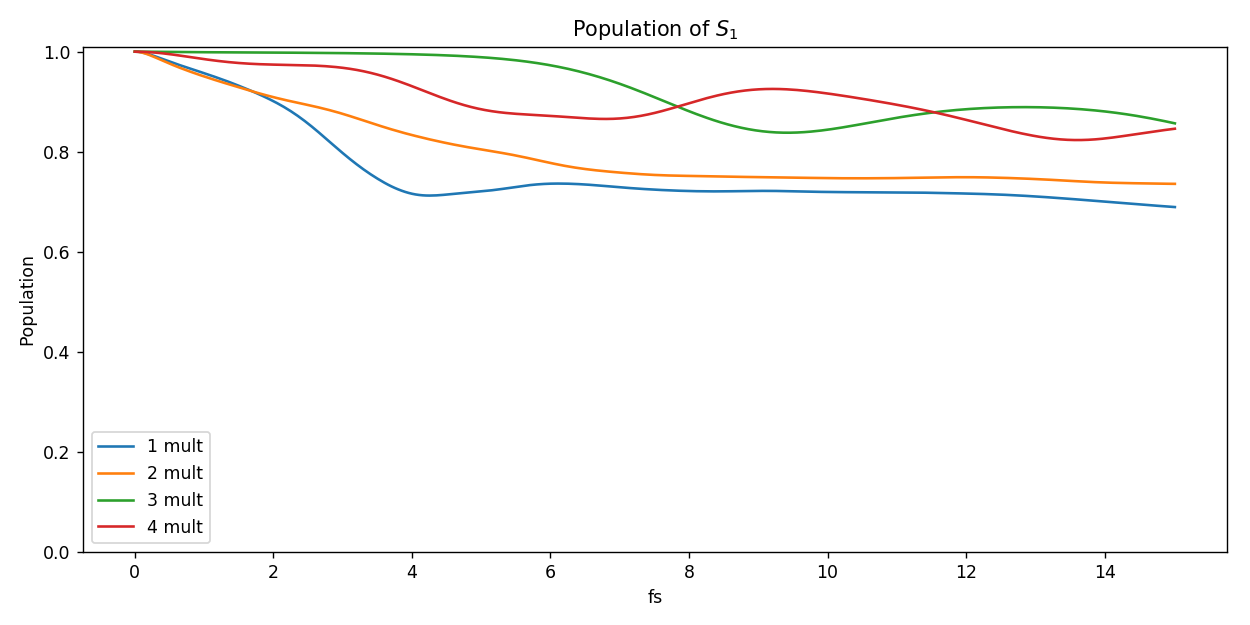

In [32]:
numbers = [10,12,14,16]
names = ['1 mult', '2 mult', '3 mult', '4 mult']
dfs = [from_folder_to_dataframe(
    os.path.join(fol, subfolders[x])) for x in numbers]

how_many_states = 2
make_population_graphs(dfs, names, range(how_many_states))

# Cooking

<IPython.core.display.Javascript object>


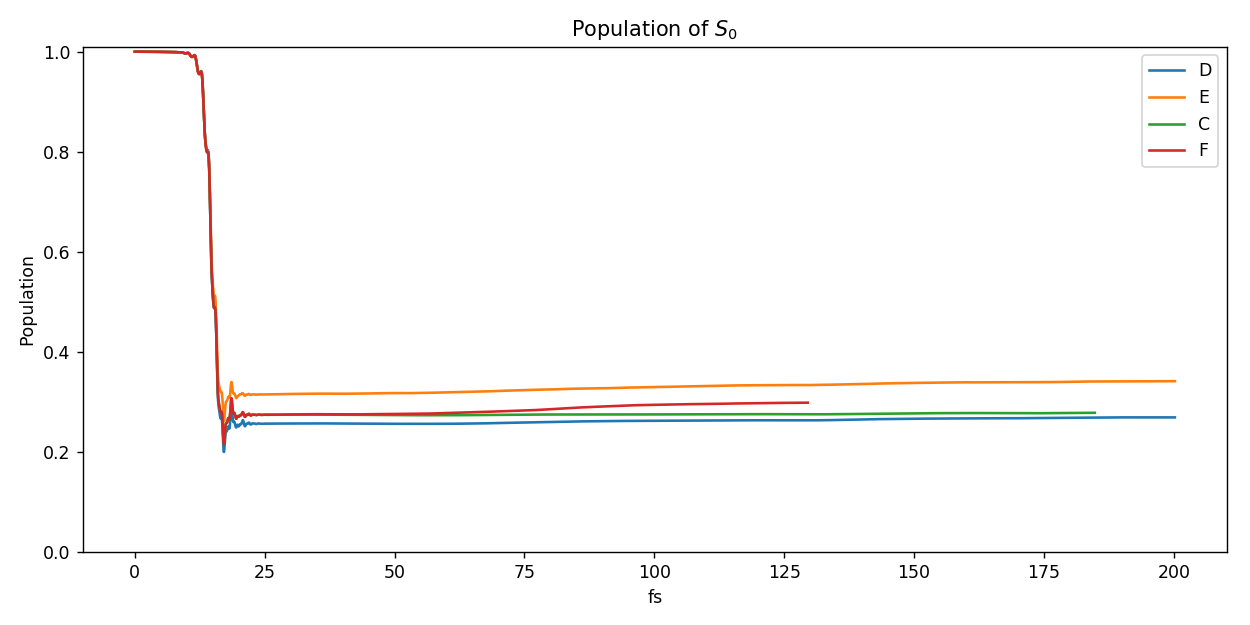

<IPython.core.display.Javascript object>


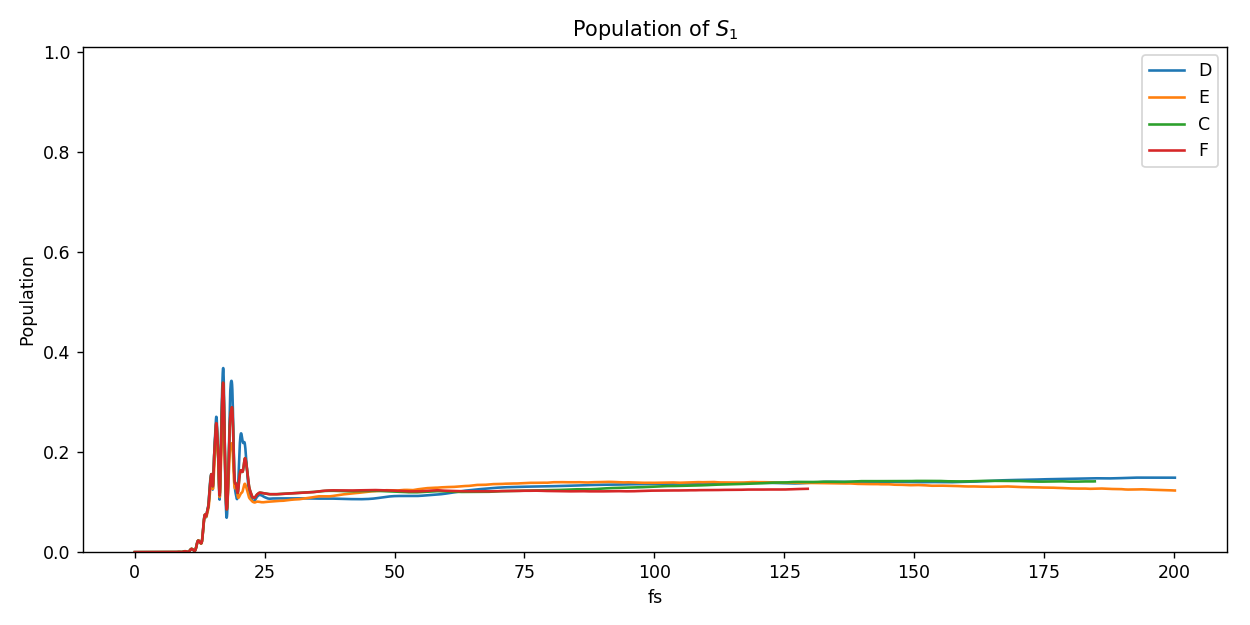

<IPython.core.display.Javascript object>


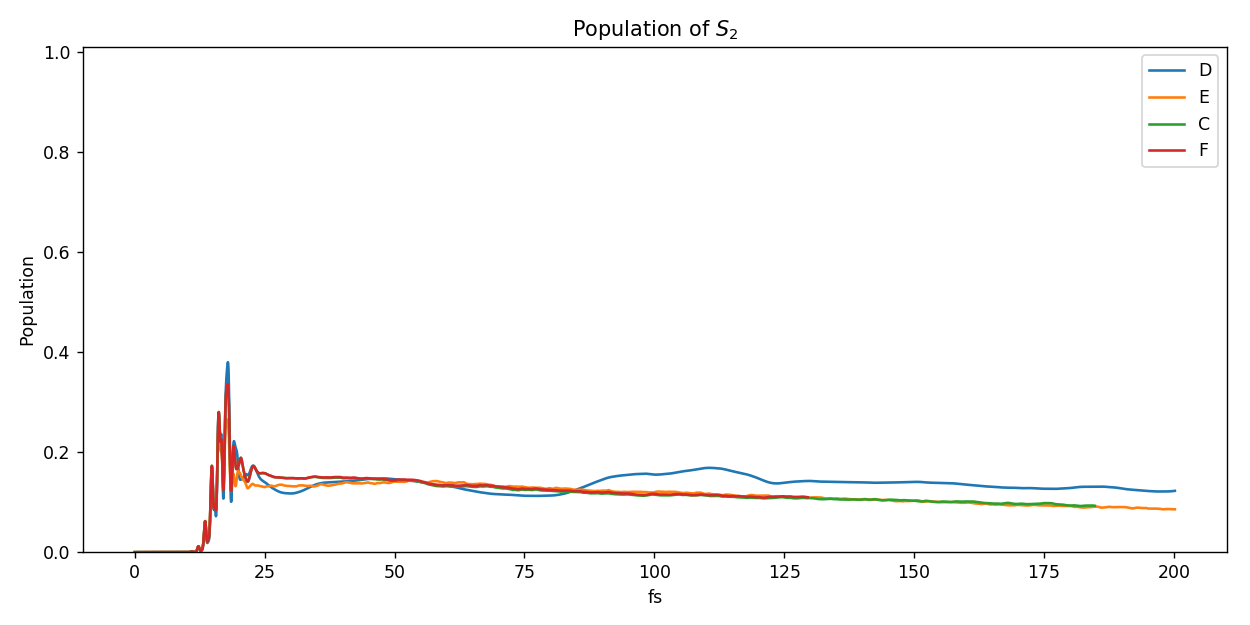

<IPython.core.display.Javascript object>


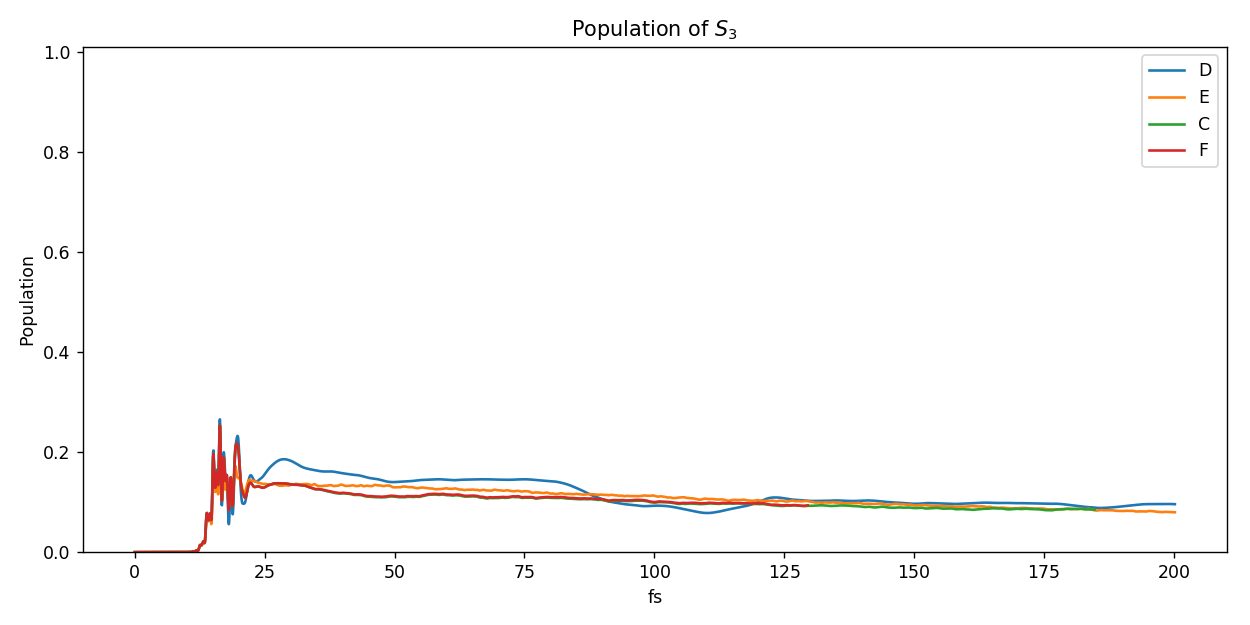

<IPython.core.display.Javascript object>


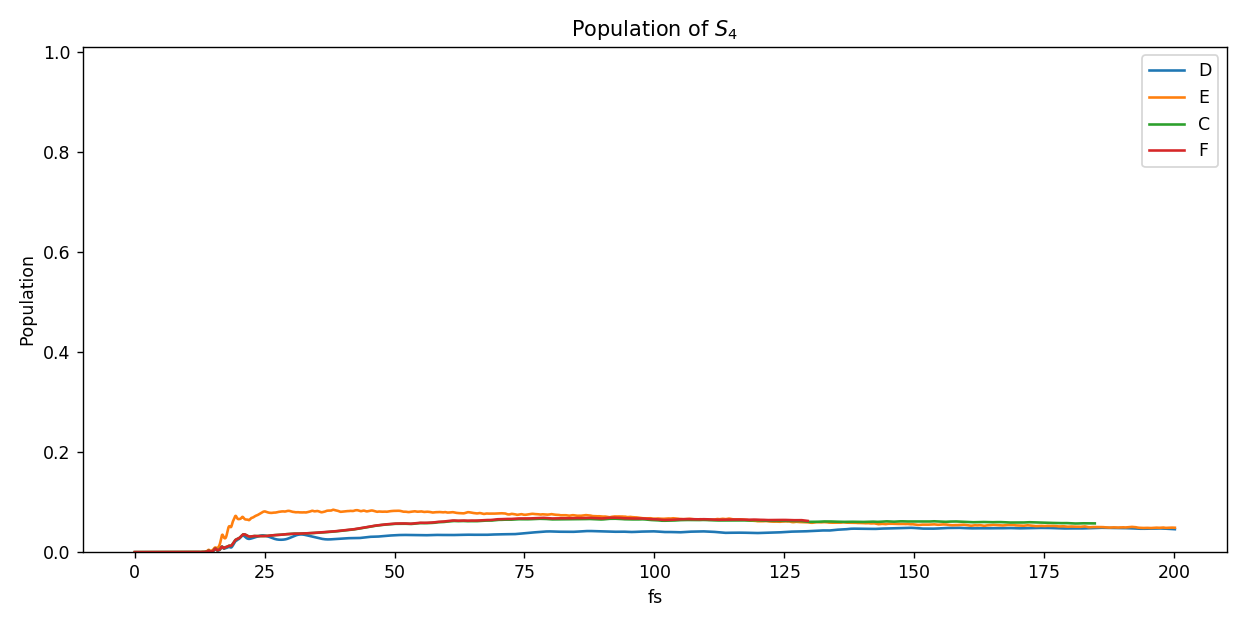

<IPython.core.display.Javascript object>


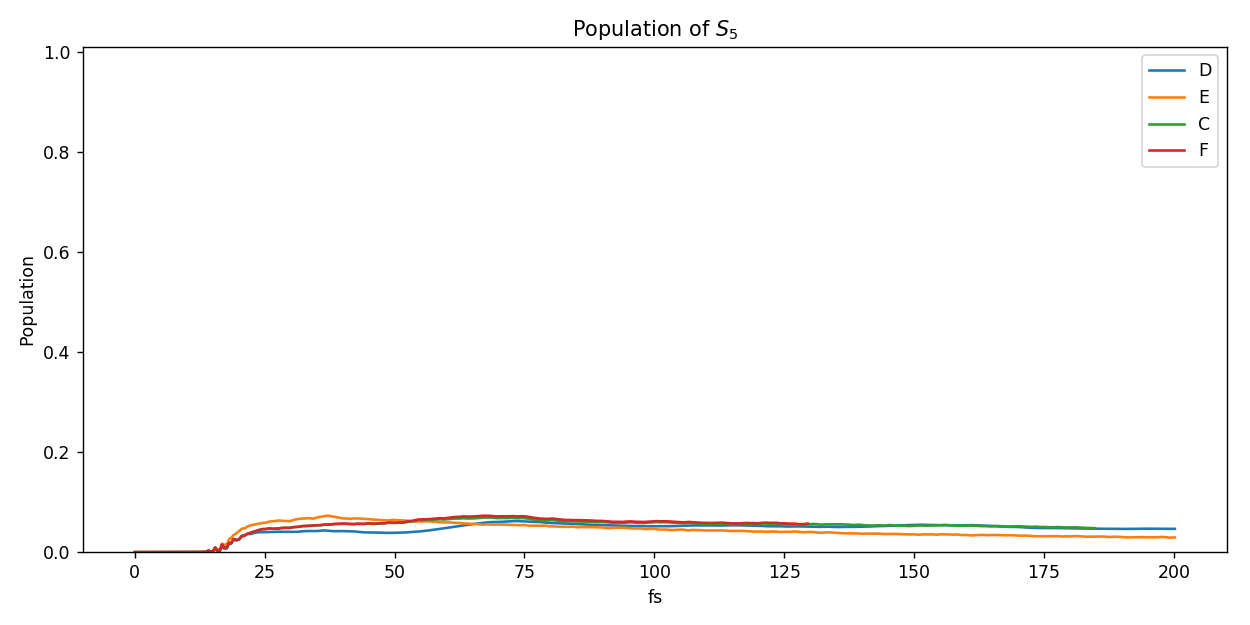

<IPython.core.display.Javascript object>


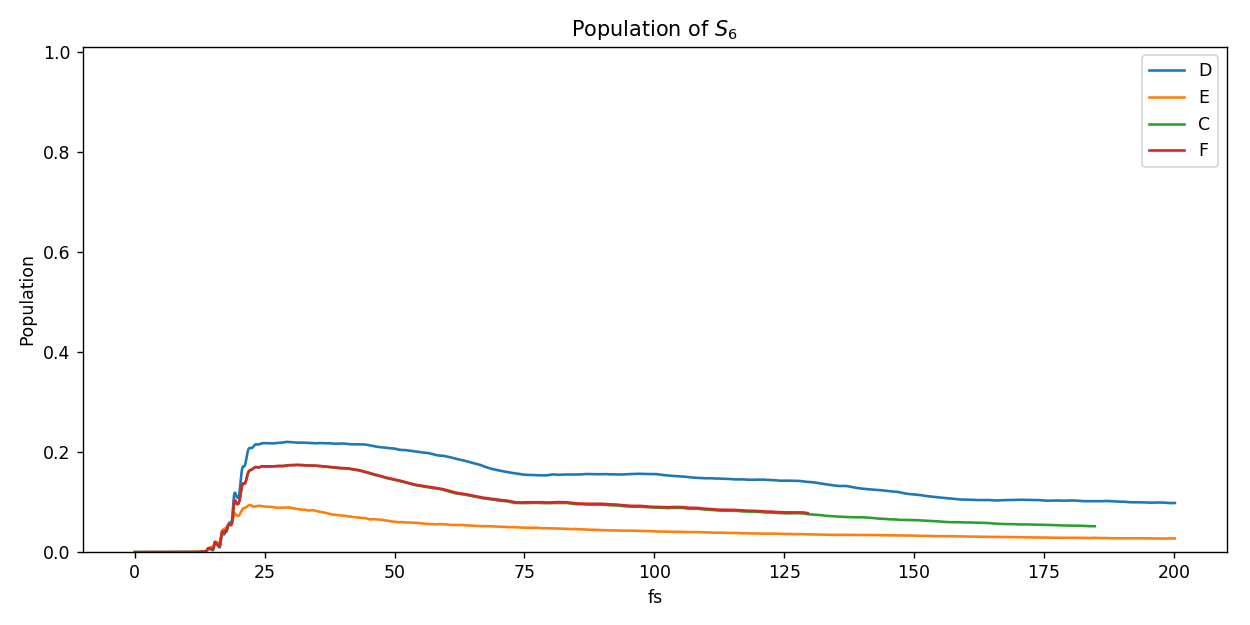

<IPython.core.display.Javascript object>


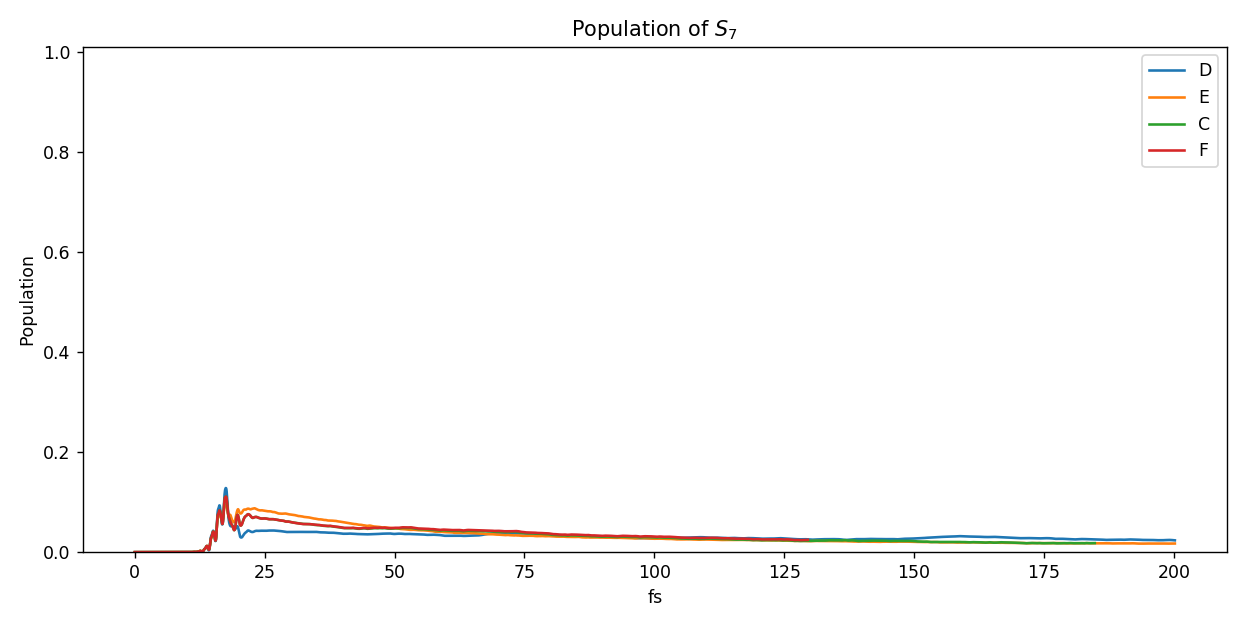

In [103]:
# %matplotlib notebook
desktop = 'C:\\Users\\utente\\Desktop'
numbers = [2,3,8,23]
names = [subfolders[x] for x in numbers]
# d-experiments_smooth01_0000 d-experiments_smooth10_0000 m-only_IR_middle140_div10_0000 y-IR140-S0notdivided_0000
names = ['D','E','C','F']

dfs = [from_folder_to_dataframe(
    os.path.join(fol, subfolders[x])) for x in numbers]

how_many_states = 8

for name, df in zip(names,dfs):
    path_file = os.path.join(desktop,'{}.csv'.format(name))
    df.to_csv()

make_population_graphs(dfs, names, range(how_many_states))

<IPython.core.display.Javascript object>


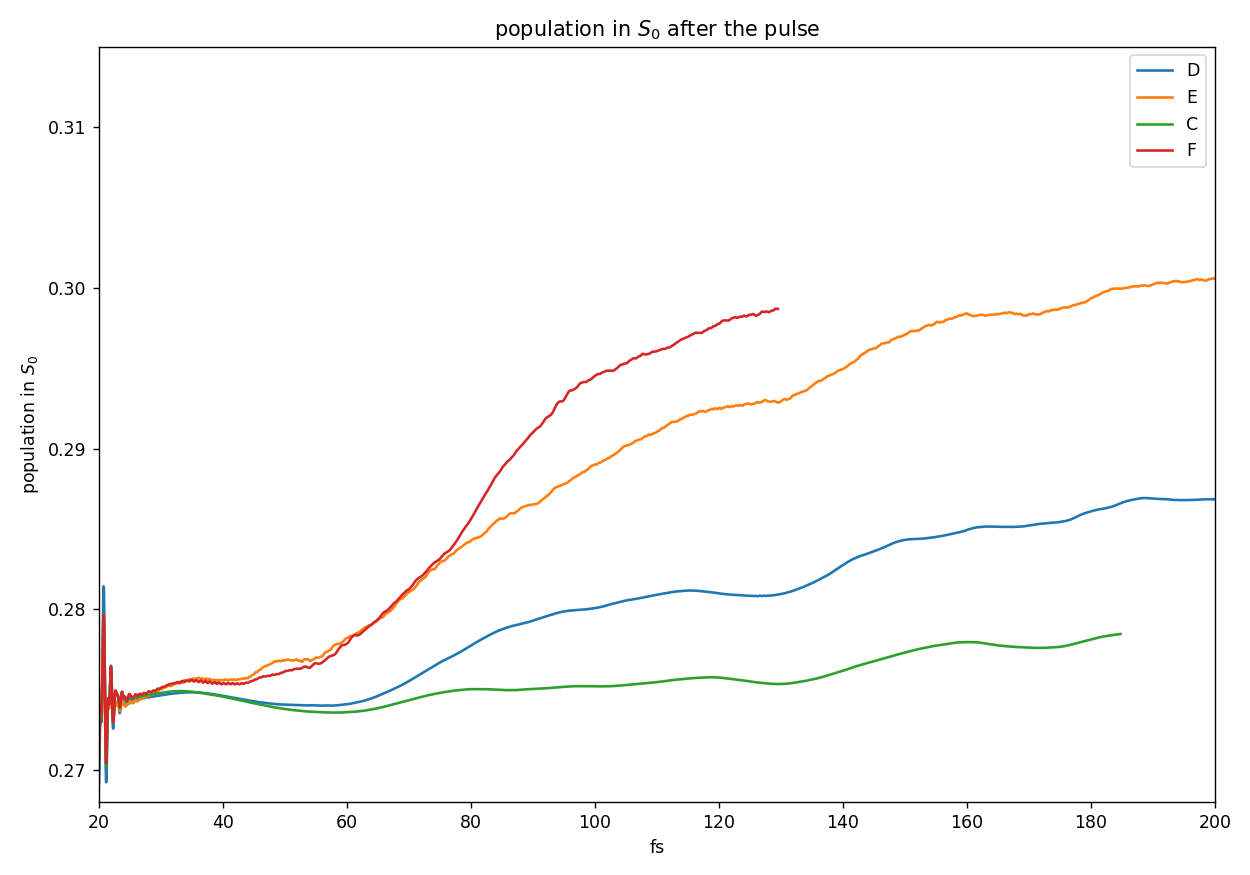

In [21]:
fig , ax0 = plt.subplots(1,1,figsize=(10,7));
labels = names
labels = ['D','E','C','F']
displacements = [0.0176,-0.041,0,0]

for x in range(len(numbers)):
    ax0.plot(dfs[x]['fs'].iloc[:, 1], dfs[x]['S0']+displacements[x], label=labels[x])
    ax0.legend()
    ax0.set_xlabel('fs')
    ax0.set_ylim(0.268,0.315)
    ax0.set_xlim(20,200)
    ax0.set_ylabel(r'population in $S_0$')
    ax0.set_title(r'population in $S_0$ after the pulse')
fig.tight_layout()


In [40]:
numbers = [2,23]
names = [subfolders[x] for x in numbers]
# d-experiments_smooth01_0000 d-experiments_smooth10_0000 m-only_IR_middle140_div10_0000 y-IR140-S0notdivided_0000
names = ['D','F']

dfs = [from_folder_to_dataframe(
    os.path.join(fol, subfolders[x])) for x in numbers]

how_many_states = 8


dfD, dfF = dfs

<IPython.core.display.Javascript object>


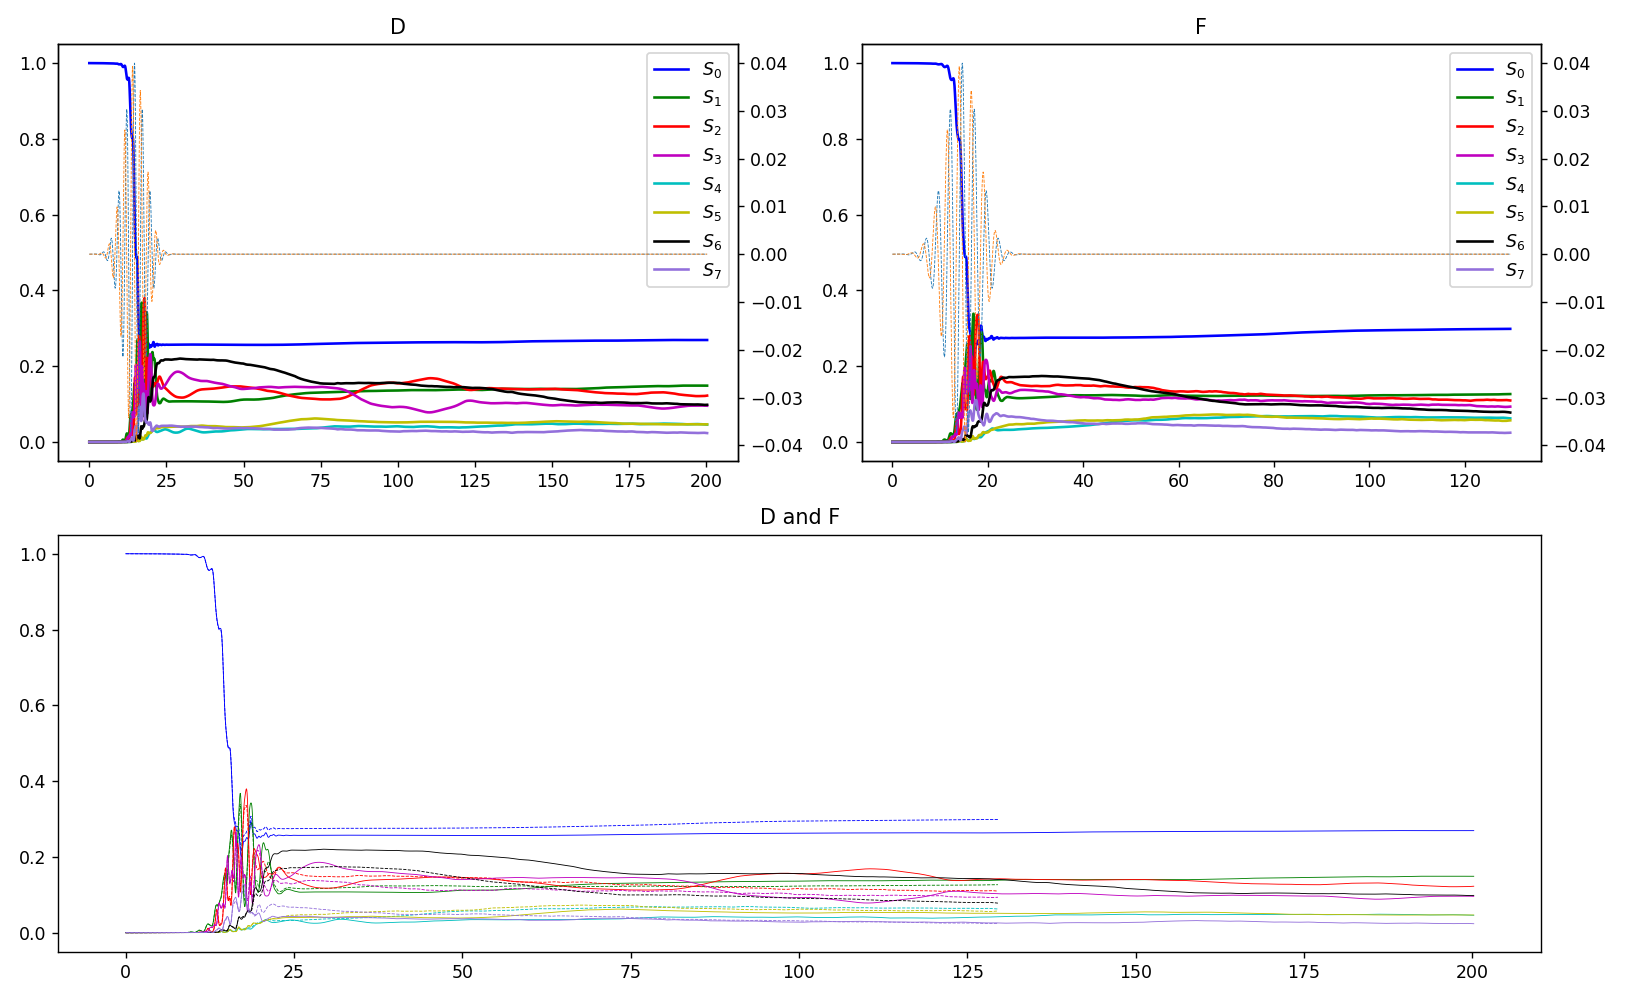

In [102]:
fig, [[ax0,ax1],[ax2,ax3]] = plt.subplots(2,2,figsize=(13,8))
colors = ['b', 'g', 'r', 'm', 'c', 'y', 'k', 'mediumpurple']
here = dfD
for state in [0,1,2,3,4,5,6,7]:
    ax0.plot(here['fs'].iloc[:,1], here['S{}'.format(state)], label=r'$S_{}$'.format(state), color=colors[state])

ax00 = ax0.twinx()
ax00.plot(here['fs'].iloc[:,1], here['Xpulse'], label='X_pulse', ls='--', lw=.5)
ax00.plot(here['fs'].iloc[:,1], here['Ypulse'], label='Y_pulse', ls='--', lw=.5)
ax0.set_title('D')
ax0.legend()

here = dfF
for state in [0,1,2,3,4,5,6,7]:
    ax1.plot(here['fs'].iloc[:,1], here['S{}'.format(state)], label=r'$S_{}$'.format(state), color=colors[state])

ax11 = ax1.twinx()
ax11.plot(here['fs'].iloc[:,1], here['Xpulse'], label='X_pulse', ls='--', lw=.5)
ax11.plot(here['fs'].iloc[:,1], here['Ypulse'], label='Y_pulse', ls='--', lw=.5)
ax1.set_title('F')
ax1.legend()

ax2 = plt.subplot2grid((2, 2), (1, 0), colspan=2)

for state in [0,1,2,3,4,5,6,7]:
    ax2.plot(dfD['fs'].iloc[:,1], dfD['S{}'.format(state)], label=r'$S_{}$'.format(state), color=colors[state], lw=.5)
    ax2.plot(dfF['fs'].iloc[:,1], dfF['S{}'.format(state)], label=r'$S_{}$'.format(state), color=colors[state], ls='--', lw=.5)

ax2.set_title('D and F')


fig.tight_layout()

In [78]:
dfD

,steps,fs,Norm deviation,Kinetic,Potential,Total,Total Deviation,Xpulse,Ypulse,Zpulse,AbZino,fs,S0,S1,S2,S3,S4,S5,S6,S7,Time AU,Abs Tot,Abs S0,Abs S1,Abs S2,Abs S3,Abs S4,Abs S5,Abs S6,Abs S7,P(t) Tot,P(t) S0,P(t) S1,P(t) S2,P(t) S3,P(t) S4,P(t) S5,P(t) S6,P(t) S7
0,0,0.000000,3.330669e-16,0.091654,0.091279,0.182933,0.000000e+00,6.018470e-07,-0.000003,0.0,-1.066187e-66,0.0000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0000,-1.066190e-66,-1.066190e-66,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.208296e-66,2.208296e-66,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
1,100,0.050050,1.741657e-08,0.091655,0.091278,0.182933,7.450631e-09,1.788736e-07,-0.000004,0.0,-1.066273e-66,0.0501,1.000000,1.901010e-12,3.668870e-09,2.496840e-10,2.404130e-10,9.419040e-10,5.769070e-10,1.476350e-09,2.0671,-1.066270e-66,-1.066270e-66,-4.681490e-72,-2.172220e-74,-7.164960e-76,-7.088750e-75,-1.748820e-74,-6.107180e-75,-8.409260e-74,4.416757e-66,4.416757e-66,9.696316e-72,4.499108e-74,1.484009e-75,1.468224e-74,3.622161e-74,1.264921e-74,1.741728e-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,399900,200.150311,7.768910e-02,0.340407,3.766910,4.107318,-3.924385e+00,0.000000e+00,-0.000000,0.0,-1.384310e-05,200.1503,0.269247,1.487770e-01,1.224270e-01,9.583840e-02,4.587400e-02,4.657370e-02,9.827060e-02,2.365020e-02,8266.2078,-1.384310e-05,-3.001060e-06,-1.068970e-06,-2.229460e-06,-1.663510e-06,-2.182180e-06,-2.975320e-06,-3.057000e-07,-4.168960e-07,1.293178e-01,1.401046e-02,1.330160e-02,2.200517e-02,1.932773e-02,1.761958e-02,2.954225e-02,5.268524e-03,8.242518e-03
4000,399999,200.199861,7.770602e-02,0.340392,3.766700,4.107092,-3.924159e+00,0.000000e+00,-0.000000,0.0,-1.384129e-05,200.1999,0.269243,1.487750e-01,1.224940e-01,9.579620e-02,4.584260e-02,4.657950e-02,9.828960e-02,2.360630e-02,8268.2542,-1.384130e-05,-2.994170e-06,-1.068850e-06,-2.224500e-06,-1.668100e-06,-2.183810e-06,-2.979460e-06,-3.050740e-07,-4.173390e-07,1.293465e-01,1.401666e-02,1.330382e-02,2.200978e-02,1.933119e-02,1.762410e-02,2.954842e-02,5.269156e-03,8.243382e-03


<IPython.core.display.Javascript object>


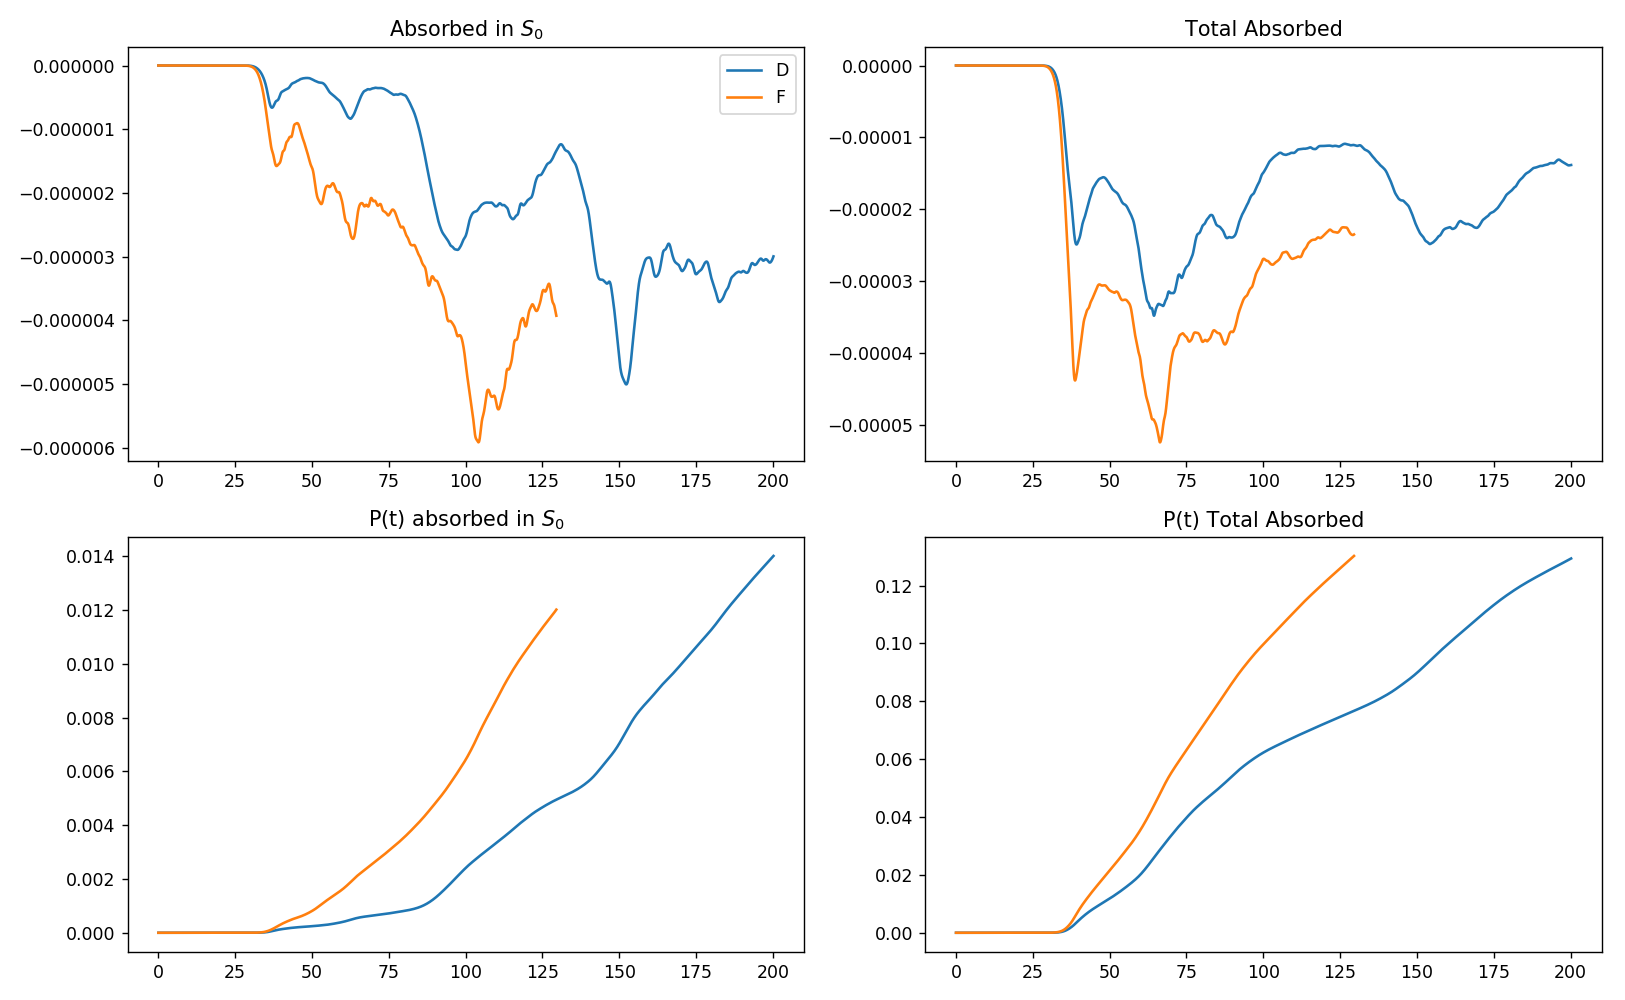

In [83]:
fig, [[ax0,ax1],[ax2,ax3]] = plt.subplots(2,2,figsize=(13,8))
colors = ['b', 'g', 'r', 'm', 'c', 'y', 'k', 'mediumpurple']

ax0.plot(dfD['fs'].iloc[:,1], dfD['Abs S0'],label='D')
ax0.plot(dfF['fs'].iloc[:,1], dfF['Abs S0'],label='F')
ax0.set_title(r'Absorbed in $S_0$')

ax1.plot(dfD['fs'].iloc[:,1], dfD['Abs Tot'])
ax1.plot(dfF['fs'].iloc[:,1], dfF['Abs Tot'])
ax1.set_title(r'Total Absorbed')

ax2.plot(dfD['fs'].iloc[:,1], dfD['P(t) S0'])
ax2.plot(dfF['fs'].iloc[:,1], dfF['P(t) S0'])
ax2.set_title(r'P(t) absorbed in $S_0$')

ax3.plot(dfD['fs'].iloc[:,1], dfD['P(t) Tot'])
ax3.plot(dfF['fs'].iloc[:,1], dfF['P(t) Tot'])
ax3.set_title(r'P(t) Total Absorbed')

ax0.legend()

fig.tight_layout();

# UV vs 140-long

<IPython.core.display.Javascript object>


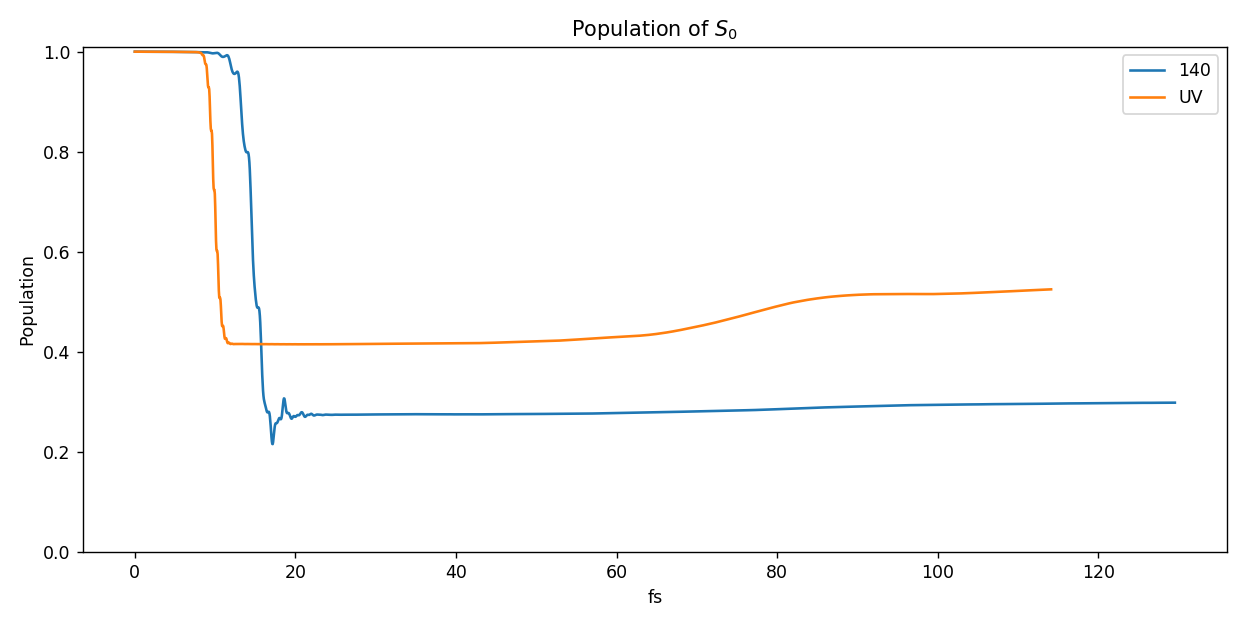

<IPython.core.display.Javascript object>


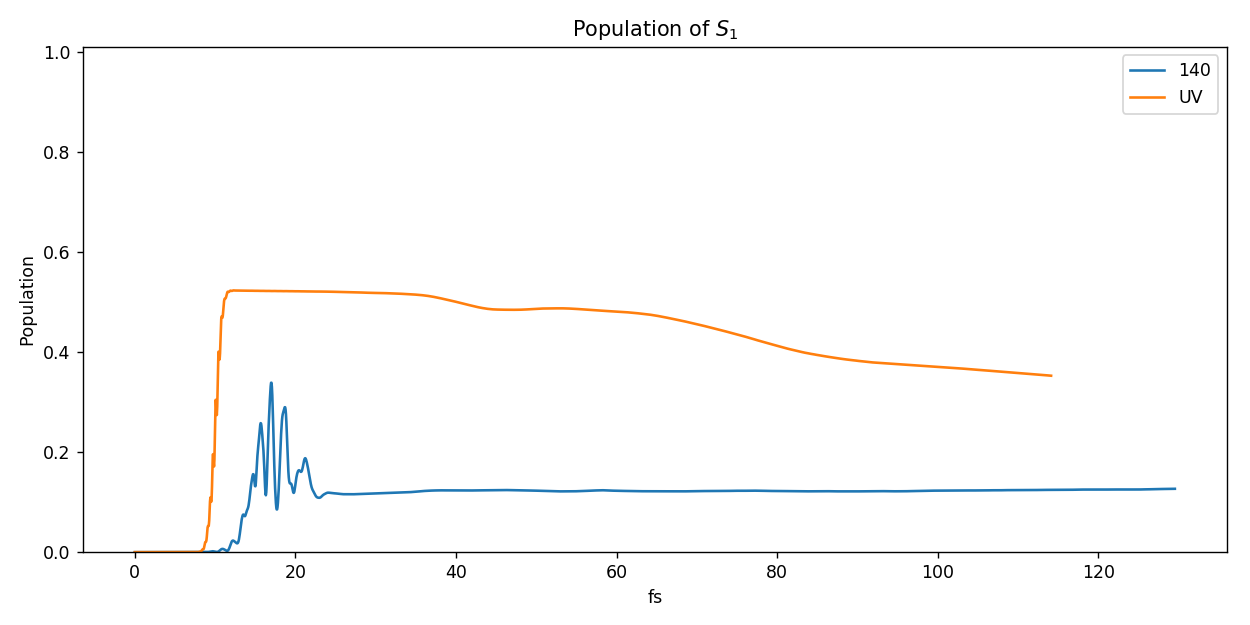

<IPython.core.display.Javascript object>


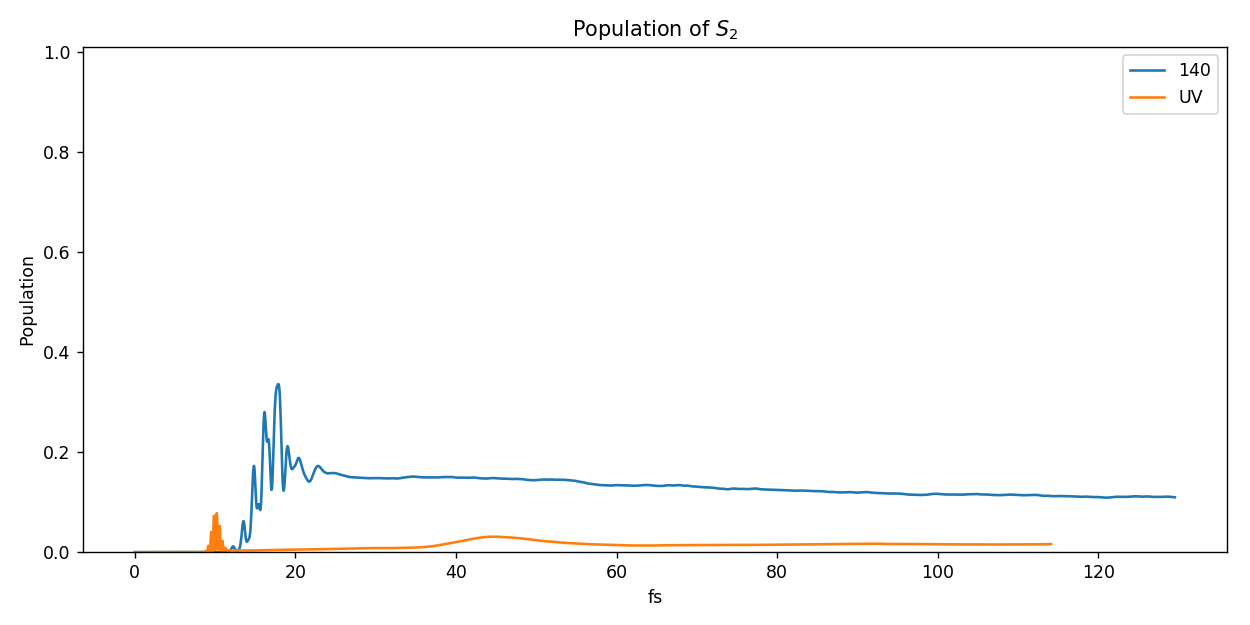

<IPython.core.display.Javascript object>


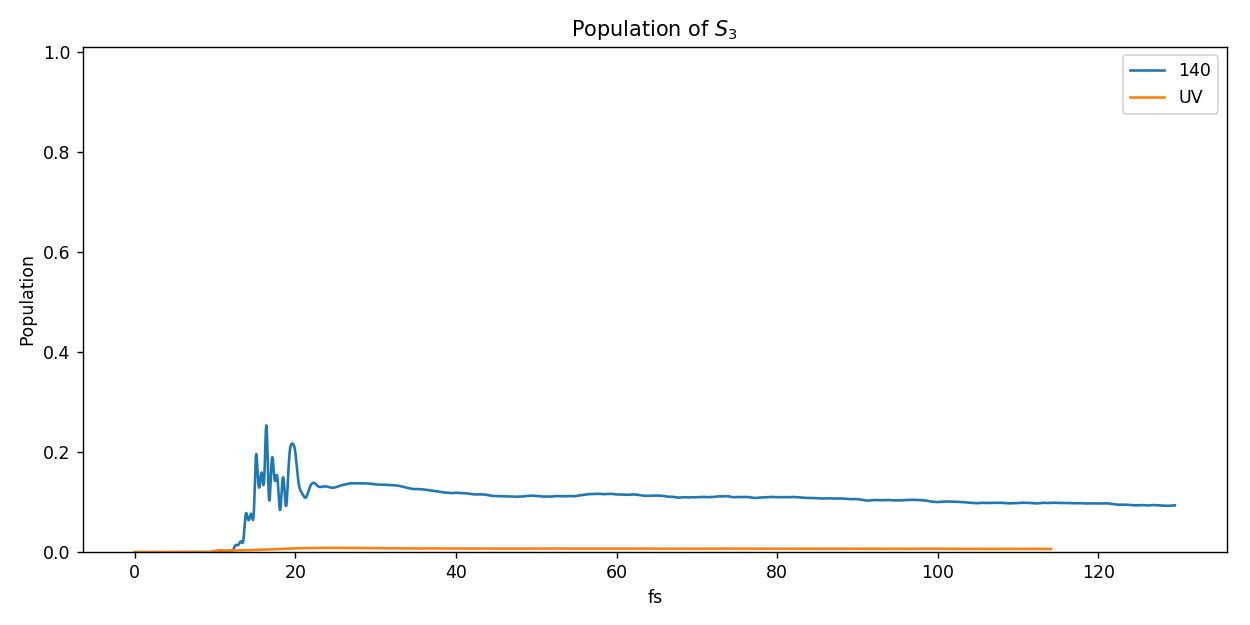

<IPython.core.display.Javascript object>


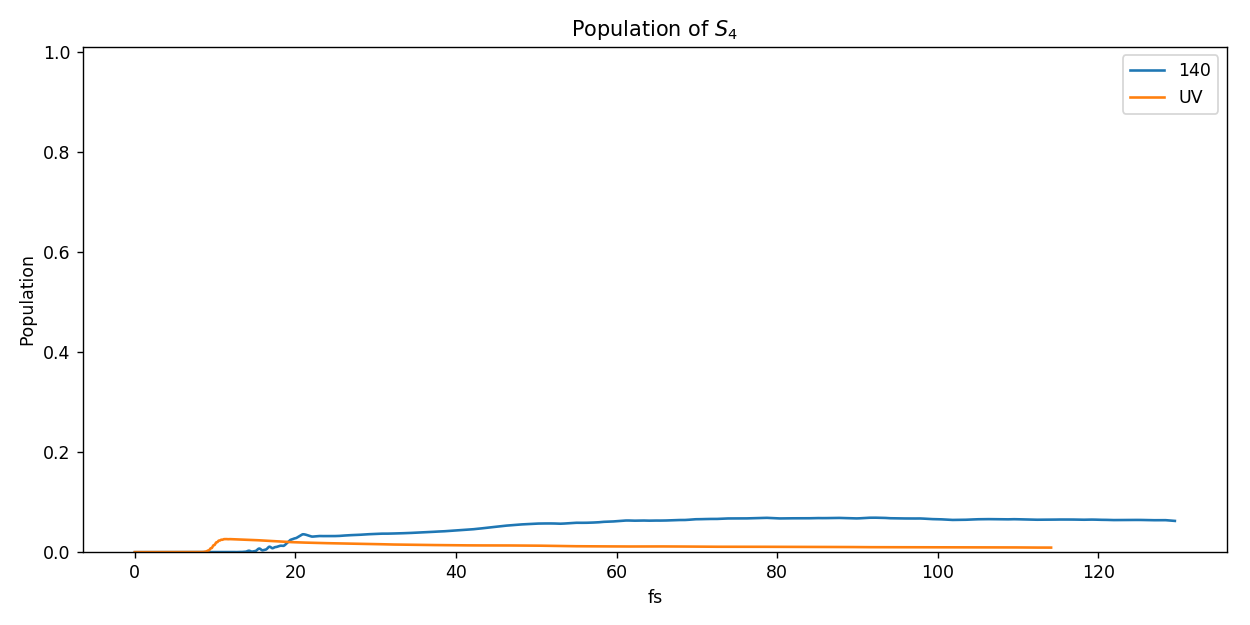

<IPython.core.display.Javascript object>


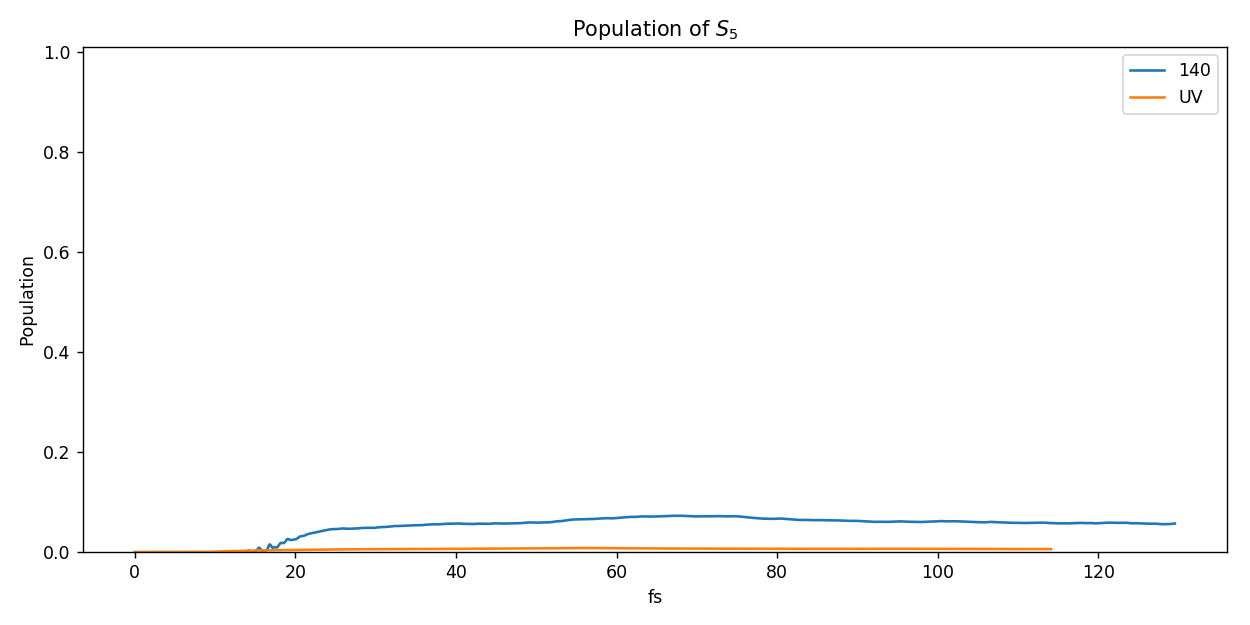

<IPython.core.display.Javascript object>


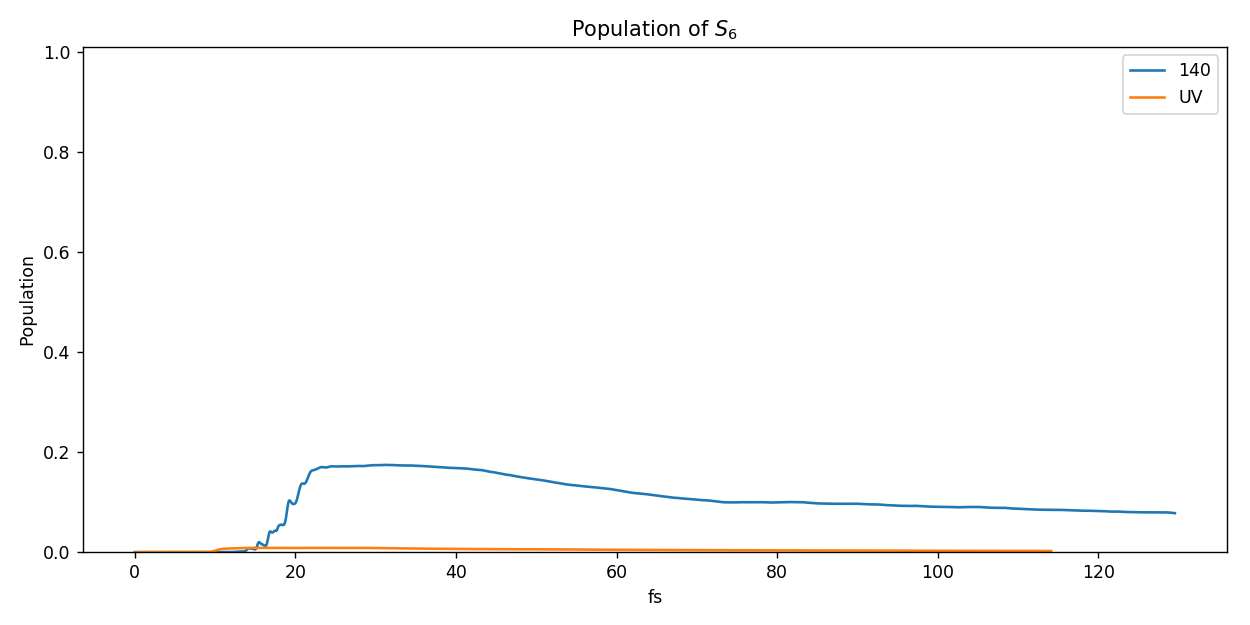

<IPython.core.display.Javascript object>


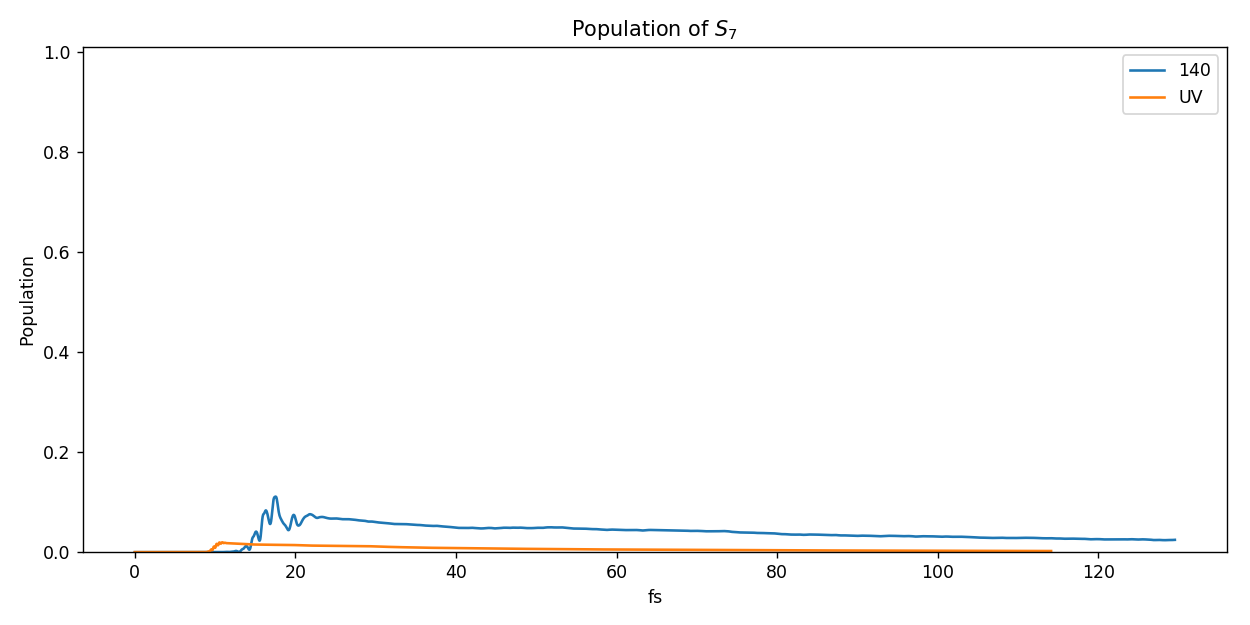

In [84]:
#%matplotlib notebook

numbers = [23,25]
# y-IR140-S0notdivided_0000 y-UV-S0notdivided_0000
names = [subfolders[x] for x in numbers]
names = ['140','UV']

dfs = [from_folder_to_dataframe(
    os.path.join(fol, subfolders[x])) for x in numbers]

how_many_states = 8
make_population_graphs(dfs, names, range(how_many_states))

In [17]:
dfs[0]

,steps,fs,Norm deviation,Kinetic,Potential,Total,Total Deviation,Xpulse,Ypulse,Zpulse,AbZino,fs,S0,S1,S2,S3,S4,S5,S6,S7,Time AU,Abs Tot,Abs S0,Abs S1,Abs S2,Abs S3,Abs S4,Abs S5,Abs S6,Abs S7
0,0,0.000000,3.330669e-16,0.091654,0.091279,0.182933,0.000000e+00,6.018470e-07,-3.471030e-06,0.0,-1.066187e-66,0.0000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0000,-1.066190e-66,-1.066190e-66,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,100,0.050050,1.741663e-08,0.091653,0.091280,0.182933,7.570760e-09,1.788736e-07,-3.750248e-06,0.0,-1.067019e-66,0.0501,0.999999,4.710600e-07,1.546090e-13,1.635820e-16,3.232010e-14,1.960990e-13,3.367220e-13,2.497590e-12,2.0671,-1.067020e-66,-1.066420e-66,-6.011790e-70,-1.124400e-77,-1.176140e-79,-1.674370e-80,-2.406950e-81,-1.854890e-81,-7.420340e-82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350,235000,117.617712,7.074239e-02,0.368691,3.845897,4.214589,-4.031656e+00,-1.351160e-202,1.109914e-202,0.0,-2.396009e-05,117.6177,0.297308,1.249390e-01,1.107420e-01,9.796690e-02,6.476170e-02,5.840500e-02,8.301370e-02,2.638340e-02,4857.6115,-2.396010e-05,-4.084590e-06,-2.354950e-06,-4.432850e-06,-3.381360e-06,-4.214970e-06,-3.536960e-06,-8.281130e-07,-1.126310e-06
2351,235100,117.667762,7.077168e-02,0.368556,3.845592,4.214148,-4.031215e+00,-7.684459e-203,8.099866e-203,0.0,-2.394510e-05,117.6678,0.297319,1.249510e-01,1.106920e-01,9.799230e-02,6.473810e-02,5.840730e-02,8.300160e-02,2.636340e-02,4859.6786,-2.394510e-05,-4.071520e-06,-2.355110e-06,-4.437930e-06,-3.383020e-06,-4.195390e-06,-3.547260e-06,-8.282440e-07,-1.126630e-06


In [85]:
dfs[1]

,steps,fs,Norm deviation,Kinetic,Potential,Total,Total Deviation,Xpulse,Ypulse,Zpulse,AbZino,fs,S0,S1,S2,S3,S4,S5,S6,S7,Time AU,Abs Tot,Abs S0,Abs S1,Abs S2,Abs S3,Abs S4,Abs S5,Abs S6,Abs S7,P(t) Tot,P(t) S0,P(t) S1,P(t) S2,P(t) S3,P(t) S4,P(t) S5,P(t) S6,P(t) S7
0,0,0.000000,3.330669e-16,0.091654,0.091279,0.182933,0.000000e+00,2.612992e-30,0.0,0.0,-1.066187e-66,0.0000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0000,-1.066190e-66,-1.066190e-66,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.208296e-66,2.208296e-66,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
1,100,0.050050,1.741664e-08,0.091653,0.091280,0.182933,7.529706e-09,4.662243e-30,0.0,0.0,-1.067019e-66,0.0501,0.999999,4.711740e-07,1.545630e-13,6.465310e-17,7.017670e-17,1.303550e-13,4.643510e-17,2.253440e-18,2.0671,-1.067020e-66,-1.066420e-66,-6.011790e-70,-1.123300e-77,-7.022740e-80,-4.430870e-88,-1.385360e-90,-7.197180e-92,-6.162140e-92,4.418311e-66,4.417068e-66,1.245164e-69,2.326582e-77,1.454552e-79,9.177231e-88,2.869362e-90,1.490682e-91,1.276304e-91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279,227900,114.064156,4.081979e-02,0.429733,2.647761,3.077494,-2.894561e+00,0.000000e+00,0.0,0.0,-1.282570e-05,114.0642,0.525088,3.525890e-01,1.608440e-02,6.410510e-03,9.093470e-03,6.144540e-03,2.339660e-03,2.276320e-03,4710.8496,-1.282570e-05,-9.886320e-06,-6.219950e-07,-2.606080e-07,-2.121260e-07,-4.042610e-07,-4.566900e-07,-3.956700e-07,-5.880230e-07,5.917608e-02,3.286918e-02,3.801244e-03,2.382484e-03,2.122814e-03,2.827252e-03,3.780344e-03,4.078762e-03,7.313997e-03
2280,228000,114.114206,4.083240e-02,0.429693,2.647615,3.077308,-2.894375e+00,0.000000e+00,0.0,0.0,-1.279064e-05,114.1142,0.525115,3.525280e-01,1.610220e-02,6.409370e-03,9.096100e-03,6.137850e-03,2.341370e-03,2.272060e-03,4712.9167,-1.279060e-05,-9.854940e-06,-6.216120e-07,-2.604530e-07,-2.120230e-07,-4.041250e-07,-4.558140e-07,-3.952630e-07,-5.864110e-07,5.920257e-02,3.288959e-02,3.802532e-03,2.383024e-03,2.123253e-03,2.828089e-03,3.781288e-03,4.079580e-03,7.315211e-03


In [98]:
on_so,on_tot = dfs[0]['P(t) S0'].tail(1), dfs[0]['P(t) Tot'].tail(1)

In [99]:
tw_so,tw_tot = dfs[1]['P(t) S0'].tail(1), dfs[1]['P(t) Tot'].tail(1)

In [100]:
on_so, on_tot, on_so/on_tot

(2588    0.01202
 Name: P(t) S0, dtype: float64, 2588    0.130225
 Name: P(t) Tot, dtype: float64, 2588    0.092304
 dtype: float64)

In [101]:
tw_so,tw_tot, tw_so/tw_tot

(2280    0.03289
 Name: P(t) S0, dtype: float64, 2280    0.059203
 Name: P(t) Tot, dtype: float64, 2280    0.555543
 dtype: float64)